In [8]:
import numpy as np
import pandas as pd

# Bước 1: Thiết lập số lượng mẫu dữ liệu
n_samples = 500

# Bước 2: Tạo các đặc trưng ngẫu nhiên cho dữ liệu nhà đất
data = {
    'LoaiNha': np.random.choice(['Chung cư', 'Nhà đất', 'Biệt thự'], n_samples),  # Loại nhà
    'DienTich': np.random.randint(30, 500, n_samples),  # Diện tích từ 30 đến 500 m²
    'GiaBan': np.random.uniform(1, 20, n_samples) * 1e9,  # Giá bán từ 1 đến 20 tỷ đồng
    'SoPhong': np.random.randint(1, 10, n_samples),  # Số phòng từ 1 đến 10
    'SoTang': np.random.randint(1, 5, n_samples),  # Số tầng từ 1 đến 5
    'HuongNha': np.random.choice(['Đông', 'Tây', 'Nam', 'Bắc'], n_samples),  # Hướng nhà
    'NamXayDung': np.random.randint(1990, 2024, n_samples),  # Năm xây dựng từ 1990 đến 2023
    'KhoangCachTT': np.random.uniform(0, 20, n_samples),  # Khoảng cách tới trung tâm (km)
    'PhapLy': np.random.choice(['Sổ đỏ', 'Sổ hồng', 'Hợp đồng mua bán'], n_samples),  # Pháp lý
    'NgayDang': pd.to_datetime(
        np.random.choice(pd.date_range('2023-01-01', '2024-10-29'), n_samples)
    )  # Ngày đăng tin
}

# Bước 3: Tạo DataFrame từ dữ liệu trên
df = pd.DataFrame(data)

# Bước 4: Lưu tập dữ liệu vào file CSV
df.to_csv('hadong_housing.csv', index=False)
print("Tập dữ liệu đã được lưu vào file hadong_housing.csv")

# Hiển thị một số dòng dữ liệu mẫu
print(df.head())


Tập dữ liệu đã được lưu vào file hadong_housing.csv
    LoaiNha  DienTich        GiaBan  SoPhong  SoTang HuongNha  NamXayDung  \
0  Biệt thự        41  9.052253e+09        1       2     Đông        1991   
1   Nhà đất       388  3.031726e+09        7       2      Tây        2011   
2  Chung cư       292  9.420275e+09        9       1      Bắc        2015   
3  Chung cư       163  6.440673e+09        2       3      Tây        2018   
4  Chung cư       376  1.961977e+10        4       4     Đông        2015   

   KhoangCachTT            PhapLy   NgayDang  
0      0.658194             Sổ đỏ 2024-04-15  
1     14.086716           Sổ hồng 2024-05-02  
2     11.948291  Hợp đồng mua bán 2023-06-20  
3      0.044667  Hợp đồng mua bán 2024-07-26  
4     16.074692           Sổ hồng 2024-04-19  


In [9]:
# Sử dụng CNN 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, ReLU

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('hadong_housing.csv')

# Bước 2: Xử lý dữ liệu
# Mã hóa các biến phân loại thành số
df['LoaiNha'] = df['LoaiNha'].astype('category').cat.codes
df['HuongNha'] = df['HuongNha'].astype('category').cat.codes
df['PhapLy'] = df['PhapLy'].astype('category').cat.codes

# Chọn các đặc trưng và biến mục tiêu
X = df.drop(['GiaBan', 'NgayDang'], axis=1)  # Đặc trưng
y = df['GiaBan']  # Biến mục tiêu

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Thay đổi hình dạng dữ liệu cho Conv1D (số mẫu, bước thời gian, đặc trưng)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Bước 3: Xây dựng mô hình CNN
model = Sequential([
    Conv1D(32, kernel_size=3, input_shape=(X_train.shape[1], 1)),  # 1. Convolutional Layer
    ReLU(),                                                        # 2. Activation Layer (ReLU)
    MaxPooling1D(pool_size=2),                                      # 3. Pooling Layer
    Flatten(),                                                     # 4. Flatten Layer
    Dense(64, activation='relu'),                                  # 5. Fully Connected Layer 1
    Dense(1)                                                       # Output Layer (Dự đoán giá)
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Bước 4: Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Bước 5: Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, MAE: {mae}')

# Bước 6: Dự đoán với dữ liệu mới (ví dụ dòng đầu tiên trong tập kiểm tra)
y_pred = model.predict(X_test[:1])
print(f'Giá trị dự đoán: {y_pred[0][0]}, Giá trị thực: {y_test.iloc[0]}')


Epoch 1/10


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 149502284878562983936.0000 - mae: 10758443008.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 145202534706982158336.0000 - mae: 10614925312.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 150577624842713956352.0000 - mae: 10874621952.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 148649767542850584576.0000 - mae: 10776930304.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139133819859891126272.0000 - mae: 10432591872.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 150051688848730095616.0000 - mae: 10806096896.0000 - val_loss: 146585298

In [10]:
# Code mô hình RNN cho dữ liệu nhà đất Hà Đông
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('hadong_housing.csv')

# Bước 2: Xử lý dữ liệu
# Mã hóa các biến phân loại thành số
df['LoaiNha'] = df['LoaiNha'].astype('category').cat.codes
df['HuongNha'] = df['HuongNha'].astype('category').cat.codes
df['PhapLy'] = df['PhapLy'].astype('category').cat.codes

# Chọn đặc trưng và biến mục tiêu
X = df.drop(['GiaBan', 'NgayDang'], axis=1)  # Các đặc trưng
y = df['GiaBan']  # Giá bán (biến mục tiêu)

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu để cải thiện hiệu suất mô hình
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Thay đổi hình dạng dữ liệu cho SimpleRNN (số mẫu, bước thời gian, đặc trưng)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Bước 3: Xây dựng mô hình RNN
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='tanh'),  # 1. Simple RNN Layer
    Dense(64, activation='relu'),                                         # 2. Dense Layer
    Dense(1)                                                              # 3. Output Layer
])

# Bước 4: Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Bước 5: Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Bước 6: Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, MAE: {mae}')

# Bước 7: Dự đoán với dữ liệu mới
y_pred = model.predict(X_test[:1])
print(f'Giá trị dự đoán: {y_pred[0][0]:,.0f} VNĐ, Giá trị thực: {y_test.iloc[0]:,.0f} VNĐ')


Epoch 1/10


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 155312649677498744832.0000 - mae: 11170458624.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144892463631856304128.0000 - mae: 10656144384.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 153639650376860827648.0000 - mae: 10961594368.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 143225436878380466176.0000 - mae: 10527558656.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155509822898684559360.0000 - mae: 11102869504.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 141499854533655789568.0000 - mae: 10483949568.0000 - val_loss: 14658529

In [12]:
# Code mô hình LSTM cho dữ liệu nhà đất Hà Đông
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('hadong_housing.csv')

# Bước 2: Xử lý dữ liệu
# Mã hóa các biến phân loại thành số
df['LoaiNha'] = df['LoaiNha'].astype('category').cat.codes
df['HuongNha'] = df['HuongNha'].astype('category').cat.codes
df['PhapLy'] = df['PhapLy'].astype('category').cat.codes

# Chọn đặc trưng và biến mục tiêu
X = df.drop(['GiaBan', 'NgayDang'], axis=1)  # Các đặc trưng
y = df['GiaBan']  # Giá bán (biến mục tiêu)

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Định hình dữ liệu cho LSTM (số mẫu, bước thời gian, đặc trưng)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Bước 3: Xây dựng mô hình LSTM
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], 1)),  # 1. LSTM Layer
    Dense(64, activation='relu'),                                    # 2. Dense Layer
    Dense(1)                                                         # 3. Output Layer
])

# Bước 4: Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Bước 5: Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Bước 6: Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, MAE: {mae}')

# Bước 7: Dự đoán với dữ liệu mới
y_pred = model.predict(X_test[:1])
print(f'Giá trị dự đoán: {y_pred[0][0]:,.0f} VNĐ, Giá trị thực: {y_test.iloc[0]:,.0f} VNĐ')


Epoch 1/10


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 151147664447111168000.0000 - mae: 10953623552.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 149317830807887282176.0000 - mae: 10773913600.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 149593130927296348160.0000 - mae: 10866712576.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 149494896160424329216.0000 - mae: 10807651328.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 145511752561084858368.0000 - mae: 10682362880.0000 - val_loss: 146585298122259300352.0000 - val_mae: 10840829952.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 149013222106528219136.0000 - mae: 10812219392.0000 - val_loss: 14658

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN - Loss: 146585298122259300352.0000, MAE: 10840829952.0000, MSE: 146585298122259300352.0000


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


RNN - Loss: 146585298122259300352.0000, MAE: 10840829952.0000, MSE: 146585298122259300352.0000


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM - Loss: 146585298122259300352.0000, MAE: 10840829952.0000, MSE: 146585298122259300352.0000


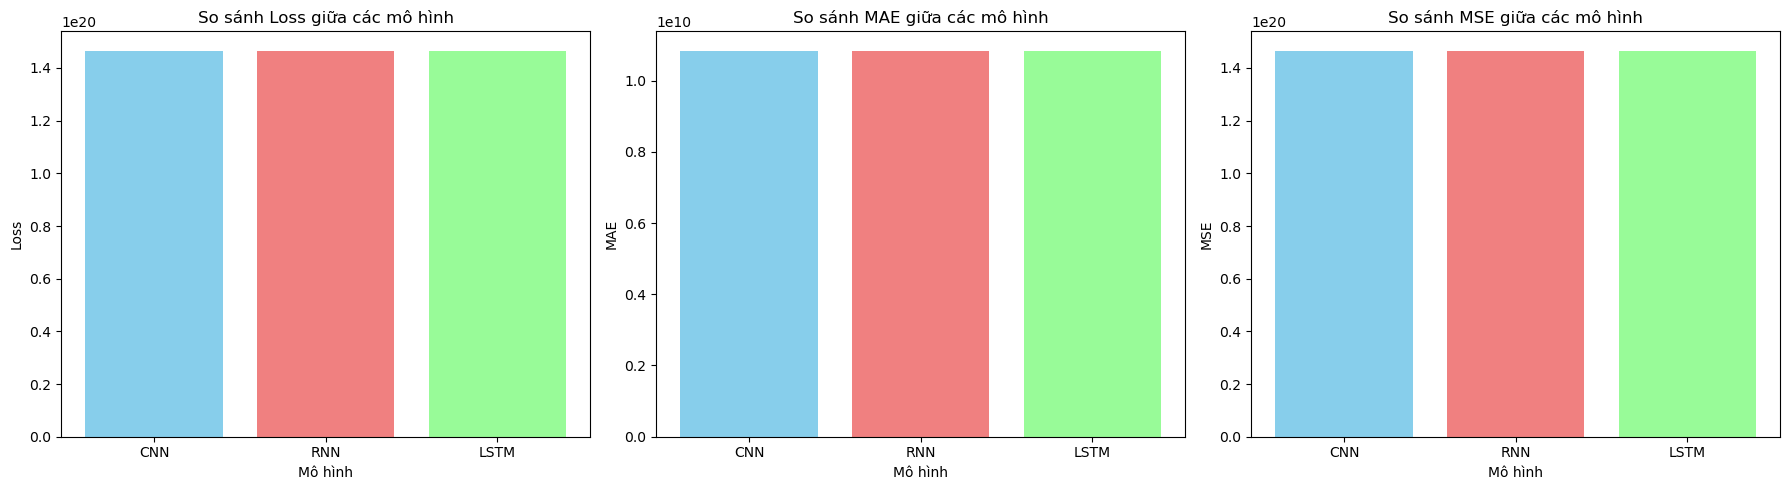

In [14]:
# So sánh 3 mô hình
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, Dense, ReLU
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('hadong_housing.csv')

# Bước 2: Xử lý dữ liệu
df['LoaiNha'] = df['LoaiNha'].astype('category').cat.codes
df['HuongNha'] = df['HuongNha'].astype('category').cat.codes
df['PhapLy'] = df['PhapLy'].astype('category').cat.codes

# Chọn đặc trưng và biến mục tiêu
X = df.drop(['GiaBan', 'NgayDang'], axis=1)
y = df['GiaBan']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Định hình dữ liệu cho các mô hình
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_name} - Loss: {loss:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')
    return loss, mae, mse

# Xây dựng và đánh giá mô hình CNN
cnn_model = Sequential([
    Conv1D(32, 3, input_shape=(X_train.shape[1], 1)),
    ReLU(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1)
])
cnn_loss, cnn_mae, cnn_mse = train_and_evaluate(cnn_model, X_train_reshaped, y_train, X_test_reshaped, y_test, 'CNN')

# Xây dựng và đánh giá mô hình RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
rnn_loss, rnn_mae, rnn_mse = train_and_evaluate(rnn_model, X_train_reshaped, y_train, X_test_reshaped, y_test, 'RNN')

# Xây dựng và đánh giá mô hình LSTM
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
lstm_loss, lstm_mae, lstm_mse = train_and_evaluate(lstm_model, X_train_reshaped, y_train, X_test_reshaped, y_test, 'LSTM')

# So sánh các mô hình bằng biểu đồ
models = ['CNN', 'RNN', 'LSTM']
loss_values = [cnn_loss, rnn_loss, lstm_loss]
mae_values = [cnn_mae, rnn_mae, lstm_mae]
mse_values = [cnn_mse, rnn_mse, lstm_mse]

# Khởi tạo biểu đồ
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Biểu đồ cột cho Loss
ax[0].bar(models, loss_values, color=['skyblue', 'lightcoral', 'palegreen'])
ax[0].set_title('So sánh Loss giữa các mô hình')
ax[0].set_xlabel('Mô hình')
ax[0].set_ylabel('Loss')

# Biểu đồ cột cho MAE
ax[1].bar(models, mae_values, color=['skyblue', 'lightcoral', 'palegreen'])
ax[1].set_title('So sánh MAE giữa các mô hình')
ax[1].set_xlabel('Mô hình')
ax[1].set_ylabel('MAE')

# Biểu đồ cột cho MSE
ax[2].bar(models, mse_values, color=['skyblue', 'lightcoral', 'palegreen'])
ax[2].set_title('So sánh MSE giữa các mô hình')
ax[2].set_xlabel('Mô hình')
ax[2].set_ylabel('MSE')

# Tùy chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()
